In [1]:
pip install google-play-scraper

  Created wheel for google-play-scraper: filename=google_play_scraper-0.1.2-py3-none-any.whl size=22283 sha256=88a3743a8eedec3eccc31472bd90b0bf8470311e0eae7275f4cbd3416c9e821e
  Stored in directory: c:\users\quayq\appdata\local\pip\cache\wheels\7c\31\92\eae6c18272cbadda3f3b29efc9dbb1ba7d96cb92397543c3c5
Successfully built google-play-scraper
Note: you may need to restart the kernel to use updated packages.


In [1]:
import json #google play returns list of json
import pandas as pd
from tqdm import tqdm

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# help hihglights some of the json results
from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

In [5]:
from google_play_scraper import Sort, reviews, app

In [6]:
%matplotlib inline
%config InlineBackend.figure_format='retina'


In [7]:
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [8]:
app_packages = [
    'com.game.colorslime',
    'com.paradyme.solarsmash',
    'com.playstrom.bob',
    'com.drawpuzzle.dop.drawit.justdrawit',
    'com.innersloth.spacemafia',
    'com.roblox.client',
    'com.uncosoft.highheels',
    'com.bgg.jump',
    'com.freeplay.runandfight',
    'com.pencil.madness',
    'com.tgame.girlgenius',
    'com.youmusic.magictiles',
    'com.gma.water.sort.puzzle',
    'com.hypercarrot.giantrush',
    'com.RBSSOFT.HyperMobile',
    'com.playstrom.dop2',
    'com.kiloo.subwaysurf',
    'com.sdpgames.sculptpeople',
    'com.amanotes.beathopper',
    'com.Born2Play.StackyDash'
]

In [9]:
len(app_packages)

20

In [10]:
app_infos = []

for ap in tqdm(app_packages):
    info = app(ap, lang='en', country='us')
    del info['comments']
    app_infos.append(info)

100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 20/20 [00:04<00:00,  4.67it/s]


In [13]:
def print_json(json_object):
    json_str = json.dumps(
        json_object,
        indent=2,
        sort_keys=True,
        default=str
    )
    
    print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [14]:
print_json(app_infos[0])

{
  "adSupported": true,
  "androidVersion": "5.0",
  "androidVersionText": "5.0 and up",
  "appId": "com.game.colorslime",
  "containsAds": true,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "XXX",
  "description": "Inject Color Dyes into Jellies. Enjoy the Perfect Spreads and Twisty Curves.  Easy Mechanics, Incredible Feel! Relaxing Gameplay \r\n\r\nFeatures: \r\n- Realistic Jelly\r\n- Amazing Shapes\r\n- Multi-Color Dyes\r\n- Special Collection",
  "descriptionHTML": "Inject Color Dyes into Jellies. Enjoy the Perfect Spreads and Twisty Curves.  Easy Mechanics, Incredible Feel! Relaxing Gameplay <br><br>Features: <br>- Realistic Jelly<br>- Amazing Shapes<br>- Multi-Color Dyes<br>- Special Collection",
  "developer": "Good Job Games",
  "developerAddress": "Akat Mahallesi Besiktas Istanbul Turkey",
  "developerEmail": "jellydye@goodjobgames.com",
  "developerId": "Good+Job+Games",
  "developerInternalID": "6007220206325811244",
  "developerWebsite":

SyntaxError: not a PNG file (<string>)

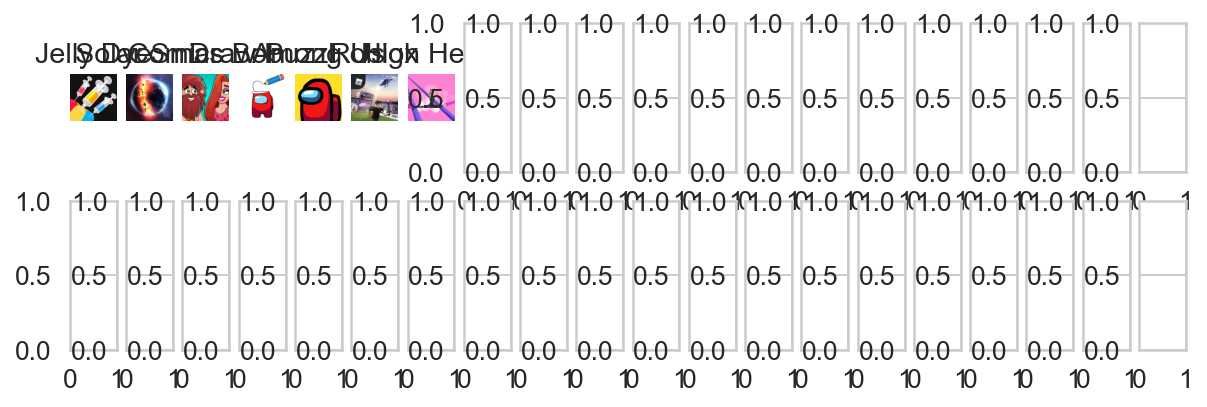

In [18]:
fig, axs = plt.subplots(2, len(app_infos), figsize=(10,3))

for i, ax in enumerate(axs.flat):
    ai = app_infos[i]
    img = plt.imread(ai['icon'])
    ax.imshow(img)
    ax.set_title(ai['title'][:10])
    ax.axis('off')

In [19]:
app_info_df = pd.DataFrame(app_infos)
app_info_df.head()

title  \
0                    Jelly Dye   
1                  Solar Smash   
2                   Comics Bob   
3  Draw Puzzle - Draw one part   
4                     Among Us   

                                         description  \
0  Inject Color Dyes into Jellies. Enjoy the Perf...   
1  Solar Smash is a planet destruction simulator,...   
2  ðŸ—¿ <b> Comics Bob â€“ Mind-bending puzzles and cl...   
3  Do you know how to draw things? Do you know ho...   
4  Play online or over local WiFi with 4-10 playe...   

                                     descriptionHTML  \
0  Inject Color Dyes into Jellies. Enjoy the Perf...   
1  Solar Smash is a planet destruction simulator,...   
2  ðŸ—¿ <b> Comics Bob â€“ Mind-bending puzzles and cl...   
3  Do you know how to draw things? Do you know ho...   
4  Play online or over local WiFi with 4-10 playe...   

                                             summary  \
0                                Relaxing Slime Game   
1                       Planet destruction simulator   
2  Help Bob Solve the Puzzle in a Stunning Cave A...   
3  Let's draw one part to check how smart you are...   
4  Join your crewmates in a multiplayer game of t...   

                                         summaryHTML      installs  \
0                                Relaxing Slime Game    1,000,000+   
1                       Planet destruction simulator   10,000,000+   
2  Help Bob Solve the Puzzle in a Stunning Cave A...    5,000,000+   
3  Let&#39;s draw one part to check how smart you...    5,000,000+   
4  Join your crewmates in a multiplayer game of t...  100,000,000+   

   minInstalls     score   ratings  reviews  ... adSupported  containsAds  \
0      1000000  4.220615     12894     3010  ...        True         True   
1     10000000  4.609341    291390    99185  ...        True         True   
2      5000000  3.797002     27282    10227  ...        True         True   
3      5000000  4.277190     16952     8889  ...        True         True   
4    100000000  3.822744  11122834  5620232  ...        True         True   

       released     updated   version  \
0   Feb 4, 2021  1616177827      1.49   
1  Jan 19, 2020  1615140818     1.4.1   
2  Oct 27, 2020  1616193600     1.1.0   
3  Dec 24, 2020  1616609221    1.0.29   
4  Jun 15, 2018  1615497146  2021.3.9   

                                       recentChanges  \
0          New Levels!\r\nBug Fixes and Improvements   
1  - bug fixes (including planet core not showing...   
2  - Gameplay improvements\r\n- Minor bug fix\r\n...   
3  + Add new 6 levels.\r\n+ New level updates dai...   
4  Added Quick Chat feature: An easier, faster, a...   

                                   recentChangesHTML editorsChoice  \
0          New Levels!<br>Bug Fixes and Improvements         False   
1  - bug fixes (including planet core not showing...         False   
2  - Gameplay improvements<br>- Minor bug fix<br>...         False   
3  + Add new 6 levels.<br>+ New level updates dai...         False   
4  Added Quick Chat feature: An easier, faster, a...          True   

                                  appId  \
0                   com.game.colorslime   
1               com.paradyme.solarsmash   
2                     com.playstrom.bob   
3  com.drawpuzzle.dop.drawit.justdrawit   
4             com.innersloth.spacemafia   

                                                 url  
0  https://play.google.com/store/apps/details?id=...  
1  https://play.google.com/store/apps/details?id=...  
2  https://play.google.com/store/apps/details?id=...  
3  https://play.google.com/store/apps/details?id=...  
4  https://play.google.com/store/apps/details?id=...  

[5 rows x 49 columns]

In [26]:
app_info_df.to_csv('app_info.csv', index=None, header=True)

# Get App Reviews

In [22]:
app_reviews = []

for ap in tqdm(app_packages):
    for score in range(1,6):
        for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
            rvs = reviews(
            ap,
            lang='en',
            country='us',
            sort=sort_order,
            count= 200 if score == 3 else 100,
            filter_score_with=score
            )[0]
            
            for r in rvs:
                r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
                r['appID']= ap
            app_reviews.extend(rvs)

100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 20/20 [01:48<00:00,  5.44s/it]


In [23]:
print_json(app_reviews[0])

{
  "appID": "com.game.colorslime",
  "at": "2021-03-22 13:16:53",
  "content": "This game is kinda good, besides the fact that the pictures show that you can put any color you want but the picture wants you to do 2 or more colors but if you don't put those colors it takes down the accuracy. One more thing the game shows it's for everyone I'm a kid so I thought it would be appropriate BUT it has a girl's bikini top and a girl's bikini bottom.",
  "repliedAt": null,
  "replyContent": null,
  "reviewCreatedVersion": "1.49",
  "reviewId": "gp:AOqpTOFNvajvGFfAIU7_Swk3NYP7Gy_Hakn0Kehpcu9NOIOJAHh9Wk8hkJKddI6GZ9wytm4OPJ1mCaVVYC91VA",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUpCount": 90,
  "userImage": "https://play-lh.googleusercontent.com/-JaDNmoKXIoY/AAAAAAAAAAI/AAAAAAAAAAA/AMZuucnx-ozePl184qnlLY_3MeAPg8ys5g/photo.jpg",
  "userName": "Trinity Smith"
}



In [24]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.shape

(23006, 12)

In [25]:
app_reviews_df.head()

reviewId       userName  \
0  gp:AOqpTOFNvajvGFfAIU7_Swk3NYP7Gy_Hakn0Kehpcu9...  Trinity Smith   
1  gp:AOqpTOFZmPht6pTJ0WM_ohgR4v7dHIrC58DEQ7Uu52b...     Noah Davis   
2  gp:AOqpTOEUIMLKIA3m4j99NSHiKVa07lsSc129TWY0RO0...        FS Ri0t   
3  gp:AOqpTOEqYo7fmNBKEPQM9bhD8jhxvwDTGLEobBrf1Rv...   Jeffery Clay   
4  gp:AOqpTOEtxRmPglzeA_iNioUaVR7tU8TkUNeT0R_3LlO...  Emalene Clark   

                                           userImage  \
0  https://play-lh.googleusercontent.com/-JaDNmoK...   
1  https://play-lh.googleusercontent.com/a-/AOh14...   
2  https://play-lh.googleusercontent.com/a-/AOh14...   
3  https://play-lh.googleusercontent.com/a-/AOh14...   
4  https://play-lh.googleusercontent.com/a-/AOh14...   

                                             content  score  thumbsUpCount  \
0  This game is kinda good, besides the fact that...      1             90   
1  Embarassed that I even downloaded it. There ar...      1              5   
2  Too many ads. The second I even touched the sc...      1            394   
3  Its not "satisfying" at all it was only satisf...      1             87   
4  There's ads in the middle of god damn levels, ...      1              2   

  reviewCreatedVersion                  at replyContent repliedAt  \
0                 1.49 2021-03-22 13:16:53         None       NaT   
1                 1.49 2021-03-22 12:33:14         None       NaT   
2                 1.43 2021-03-20 08:26:23         None       NaT   
3                 1.49 2021-03-21 13:54:32         None       NaT   
4                 1.49 2021-03-22 16:09:04         None       NaT   

       sortOrder                appID  
0  most_relevant  com.game.colorslime  
1  most_relevant  com.game.colorslime  
2  most_relevant  com.game.colorslime  
3  most_relevant  com.game.colorslime  
4  most_relevant  com.game.colorslime

In [27]:
app_reviews_df.to_csv('app_reviews.csv', index=None, header=True)